In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
df = yf.download('EURUSD=X', interval='30m', period="1d")

[*********************100%%**********************]  1 of 1 completed


In [11]:
def RSI(df):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=13).mean()
    avg_loss = loss.rolling(window=13).mean()
    RS = avg_gain / avg_loss
    RSI = 100 - (100/(1+RS))
    df['RSI'] = RSI
    df['Overbought'] = 70
    df['Oversold'] = 30
    return df

In [12]:
df = RSI(df)

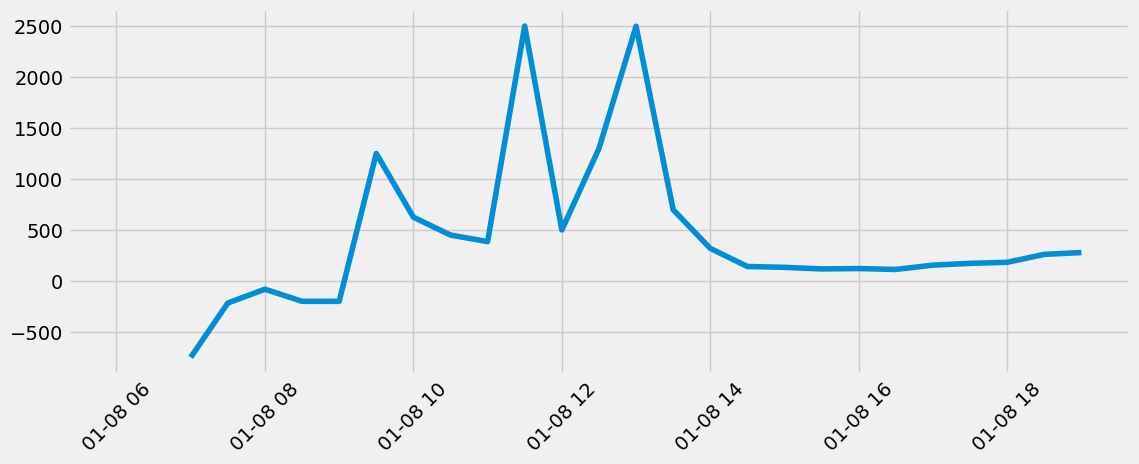

In [16]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df.RSI)
plt.xticks(rotation=45)
plt.show()